In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [33]:
mktcap = pd.read_pickle("ryu_new_mktcap3.pickle")
price = pd.read_pickle("ryu_new_price3.pickle")
vol = pd.read_pickle("ryu_new_volume3.pickle")

weight = mktcap.apply(lambda x: x/ np.nansum(x), axis=1)
rtn = price.pct_change(fill_method=None) * np.sign(price)

In [34]:
# 가중 리턴이 하루에 10%가 넘어가는 친구들?
wei_rtn = weight * rtn

p_coin = (wei_rtn> 0.08).sum().loc[((wei_rtn> 0.08).sum() > 0).values] # 거의 대부분이 BTC임 기준을 좀 더 높게 잡아보자
p_coin

BTC      115
ECOM       1
RISE2      1
XRP        1
xEUR       1
dtype: int64

In [35]:
# 문제가 되는 날 출력
problem_date = {}

for coin in p_coin.index:
    if str(coin) == "BTC":
        continue
    find = wei_rtn[[coin]].loc[(wei_rtn[[coin]] > 0.08).values]
    problem_date[coin] = find.index.strftime("%Y-%m-%d").to_list()[0]

problem_date

{'ECOM': '2019-10-10',
 'RISE2': '2021-12-01',
 'XRP': '2017-05-08',
 'xEUR': '2020-02-02'}

ECOM

In [36]:
# ECOM: 직접 확인한 결과, 10월 2일부터 9일까지의 데이터가 전부 잘못되어 있음(나머진 괜찮음)
t_0 = "2019-10-01"
t_1 = "2019-10-13"

print(price.loc[t_0:t_1, "ECOM"])

print(mktcap.loc[t_0:t_1, "ECOM"])

print(vol.loc[t_0:t_1, "ECOM"])

2019-10-01    0.005822
2019-10-02    0.000002
2019-10-03    0.000002
2019-10-04    0.000002
2019-10-05    0.000002
2019-10-06    0.000002
2019-10-07    0.000002
2019-10-08    0.000002
2019-10-09    0.000002
2019-10-10    0.033034
2019-10-11    0.057302
2019-10-12    0.063683
2019-10-13    0.069258
Name: ECOM, dtype: float64
2019-10-01     377361.00
2019-10-02        113.55
2019-10-03        113.55
2019-10-04        113.55
2019-10-05        113.55
2019-10-06        113.55
2019-10-07        113.55
2019-10-08        113.55
2019-10-09        113.55
2019-10-10    2141072.00
2019-10-11    3713933.00
2019-10-12    4127518.00
2019-10-13    4488813.00
Name: ECOM, dtype: float64
2019-10-01    1269.250000
2019-10-02       0.000035
2019-10-03       0.000000
2019-10-04       0.000000
2019-10-05       0.000000
2019-10-06       0.000000
2019-10-07       0.000000
2019-10-08       0.000000
2019-10-09       0.000000
2019-10-10    4931.440000
2019-10-11    2272.720000
2019-10-12     433.380000
2019-10-13

In [47]:
# Data를 직접 확인해봤는데, 모든 Daily 값을 확인할 수는 없었음, 잘 못된 거라는 것만 확실하게 발견
# 2019년 10월 1일 Data를 2019년 10월 2일 ~9일 까지 ffill해주는 식으로 클리닝 해주겠음
price.loc["2019-10-02":"2019-10-09",["ECOM"]] = price.loc["2019-10-01","ECOM"]
mktcap.loc["2019-10-02":"2019-10-09",["ECOM"]] = mktcap.loc["2019-10-01","ECOM"]
vol.loc["2019-10-02":"2019-10-09",["ECOM"]] = vol.loc["2019-10-01","ECOM"]

RISE2: '2021-12-01

* coinmarketcap 확인결과, 2021년 12월 1일 이전 값은 전부 NaN으로 처리해주면 될 것 같음

In [57]:
price.loc[:"2021-12-01",["RISE2"]] = np.nan

<AxesSubplot:>

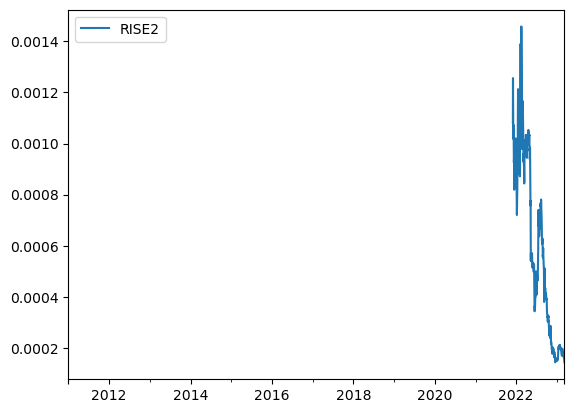

In [58]:
price[["RISE2"]].plot()

XRP': '2017-05-08 -> 아무 문제 없는듯...

In [59]:
t_0 = "2017-05-07"
t_1 = "2017-05-10"

print(price.loc[t_0:t_1, "XRP"])

print(mktcap.loc[t_0:t_1, "XRP"])

print(vol.loc[t_0:t_1, "XRP"])

2017-05-07    0.121433
2017-05-08    0.189096
2017-05-09    0.171416
2017-05-10    0.179741
Name: XRP, dtype: float64
2017-05-07    4.615251e+09
2017-05-08    7.170061e+09
2017-05-09    6.538416e+09
2017-05-10    6.754185e+09
Name: XRP, dtype: float64
2017-05-07    143259514.0
2017-05-08    344584667.0
2017-05-09    331507790.0
2017-05-10    174371344.0
Name: XRP, dtype: float64


xEUR': '2020-02-02' -> 드랍 (coinmarketcap에서 tracking 하지 않는 코인)

<AxesSubplot:>

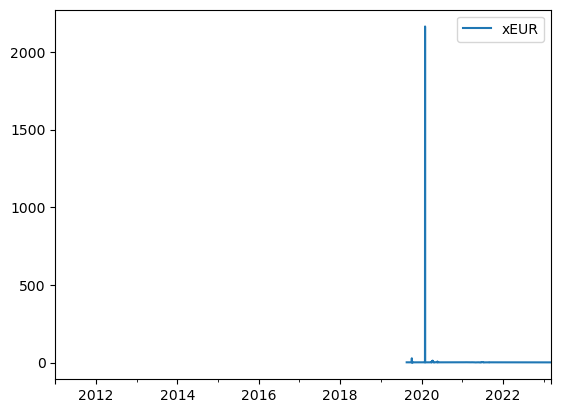

In [61]:
price[["xEUR"]].plot()

In [62]:
price_pp = price.drop("xEUR", axis=1)
mktcap_pp = mktcap.drop("xEUR", axis=1)
vol_pp = vol.drop("xEUR", axis=1)

In [63]:
# Save
price_pp.to_pickle("ryu_new_price4.pickle")
mktcap_pp.to_pickle("ryu_new_mktcap4.pickle")
vol_pp.to_pickle("ryu_new_volume4.pickle")

step 4-2)

In [4]:
mktcap = pd.read_pickle("ryu_new_mktcap4.pickle")
price = pd.read_pickle("ryu_new_price4.pickle")
vol = pd.read_pickle("ryu_new_volume4.pickle")

weight = mktcap.apply(lambda x: x/ np.nansum(x), axis=1)
pct = price.pct_change(fill_method=None) * np.sign(price)

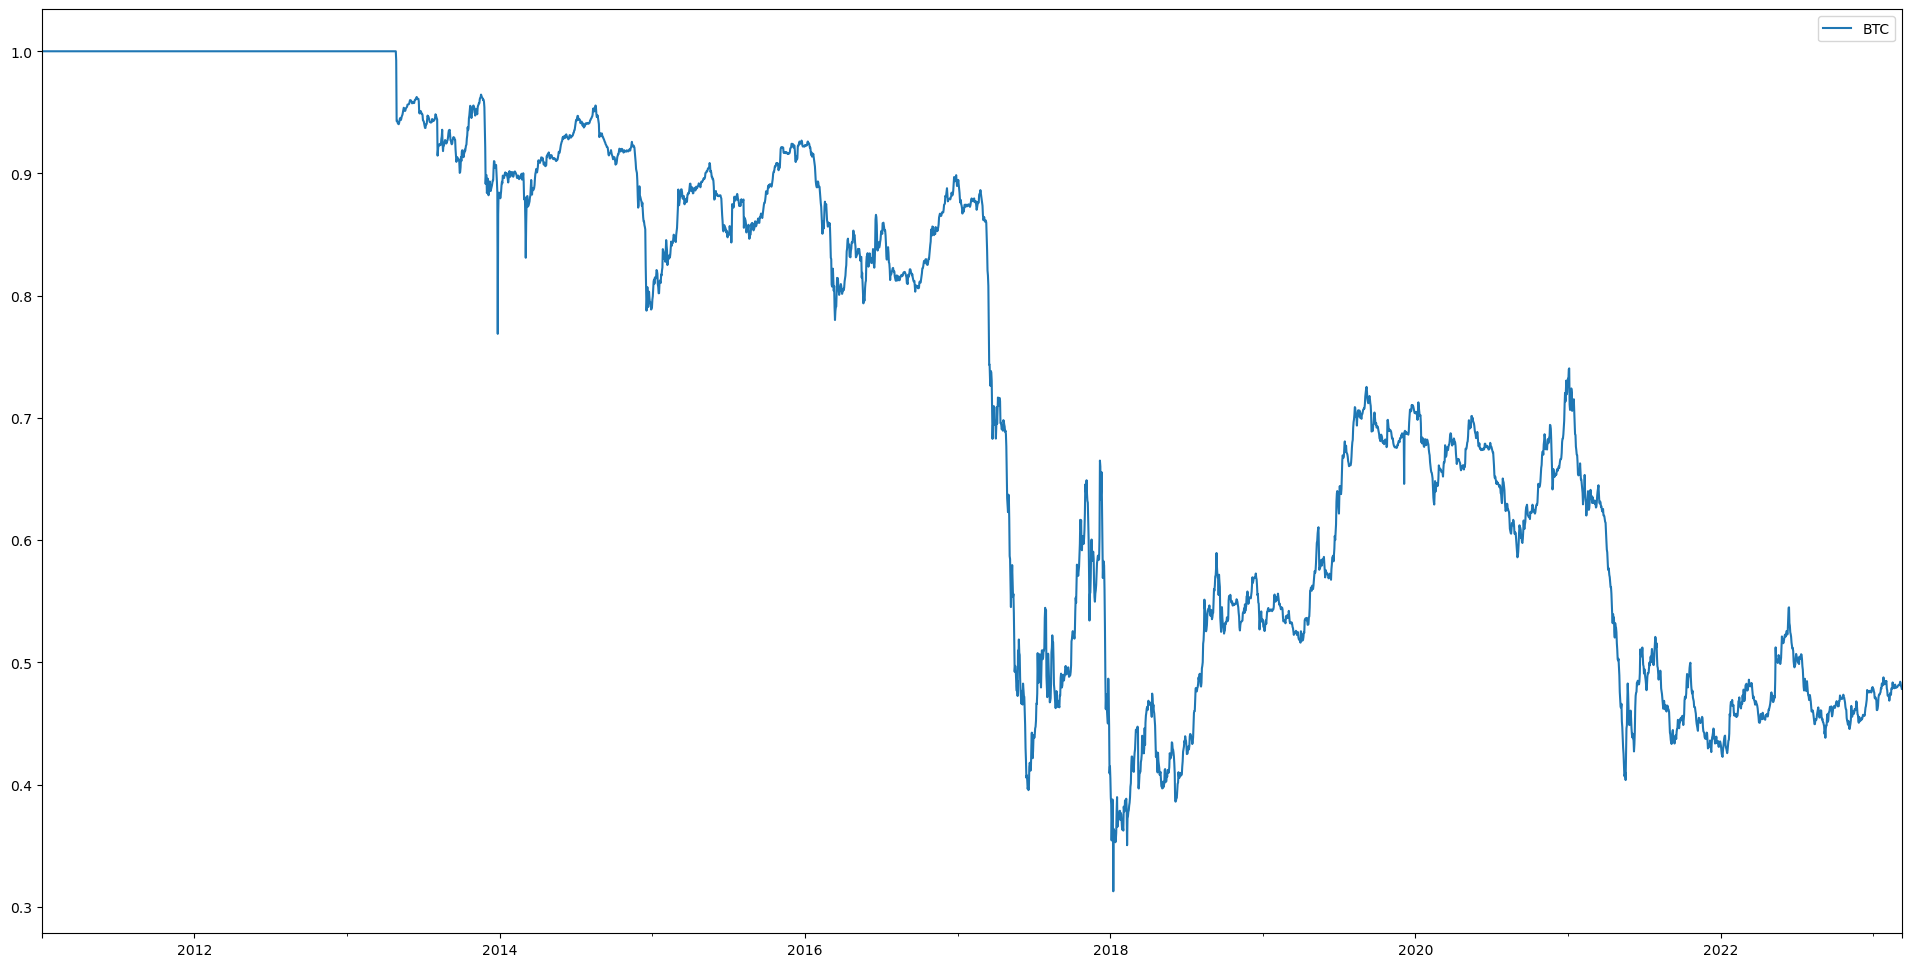

In [5]:
weight[["BTC"]].plot(figsize=(24,12));
# 2014년 전후로 두 날이 클리닝이 덜 된 것 같음

In [6]:
# weight가 팍 튀는 친구를 찾아보자

pct_weight = weight.pct_change(fill_method=None)
weight_problem_coin = (pct_weight > 1000).sum().loc[(pct_weight > 1000).sum() > 0]
weight_problem_coin

ADX       1
AMO       1
ANT       1
ARDR      1
BAAS      1
         ..
WINGS     1
XAUR      1
XSN      25
YIN       1
ZOON      1
Length: 71, dtype: int64

In [7]:
# 문제가 되는 날 출력
problem_date = {}

for coin in weight_problem_coin.index:
    if str(coin) == "BTC":
        continue
    find = pct_weight[[coin]].loc[(pct_weight[[coin]] > 1000).values]
    problem_date[coin] = find.index.strftime("%Y-%m-%d").to_list()[0]

problem_date

{'ADX': '2018-03-25',
 'AMO': '2018-09-24',
 'ANT': '2018-03-25',
 'ARDR': '2018-03-25',
 'BAAS': '2022-05-16',
 'BAR': '2021-04-21',
 'BAT': '2018-03-25',
 'BCZERO': '2020-06-17',
 'BLOCK2': '2022-03-14',
 'BNB': '2018-03-25',
 'BTM': '2018-03-25',
 'CSM3': '2021-09-15',
 'CTCN': '2022-01-18',
 'CWV': '2021-10-11',
 'DCN': '2017-10-15',
 'DESO': '2022-01-01',
 'DINO': '2021-10-25',
 'DNT': '2018-03-25',
 'EDG': '2018-03-25',
 'EOS': '2018-03-25',
 'FAB2': '2020-11-18',
 'FRIN': '2022-01-28',
 'FUN': '2018-03-25',
 'GAS': '2018-03-25',
 'GAT3': '2021-08-12',
 'GENRE': '2022-02-14',
 'GNO': '2017-10-09',
 'GUP': '2018-03-25',
 'GXT': '2021-12-06',
 'HMQ': '2018-03-25',
 'LEVL': '2022-08-30',
 'LSK': '2018-03-25',
 'LUN': '2018-03-25',
 'LUNA': '2022-05-30',
 'MAID': '2018-03-25',
 'MCO': '2018-03-25',
 'MLN': '2018-03-25',
 'NANO': '2018-02-26',
 'NEC': '2020-06-24',
 'OMI': '2019-10-10',
 'OPEN': '2022-03-15',
 'OXB': '2022-10-19',
 'PAY': '2018-03-25',
 'PCX': '2020-12-10',
 'PPT': '2

In [8]:
{date for key, date in problem_date.items()}

{'2017-10-09',
 '2017-10-15',
 '2018-02-26',
 '2018-03-25',
 '2018-09-24',
 '2019-10-10',
 '2020-06-17',
 '2020-06-24',
 '2020-11-02',
 '2020-11-18',
 '2020-12-10',
 '2021-04-21',
 '2021-07-14',
 '2021-08-12',
 '2021-08-15',
 '2021-09-01',
 '2021-09-15',
 '2021-09-19',
 '2021-10-10',
 '2021-10-11',
 '2021-10-15',
 '2021-10-25',
 '2021-11-15',
 '2021-12-06',
 '2021-12-14',
 '2021-12-27',
 '2022-01-01',
 '2022-01-18',
 '2022-01-28',
 '2022-02-14',
 '2022-03-01',
 '2022-03-14',
 '2022-03-15',
 '2022-05-16',
 '2022-05-30',
 '2022-08-30',
 '2022-10-19'}

pct_change가 튀는 걸 찾자

* mktcap의 sign으로 스크리닝 해서 pct_change를 계산하자

In [9]:
# 마켓켑이 음수인 애들을 처리하자
mktcap_problem = (mktcap < 0).sum().loc[((mktcap < 0).sum() > 0).values]
mktcap_problem

ADX       5
ANT      13
ARDR      2
B3       10
BAT       3
BNB       3
BNT       7
BTM       5
COVAL    10
CVC      10
DCN      17
DNT       5
EDG      10
EOS       8
FLDC     11
FUN       8
GAS      10
GENE     10
GLM       9
GNO      13
GUP       3
HMQ      13
HST      23
IXT      11
KCS       2
LSK       2
LUN       6
MAID      4
MCO       3
MLN      15
PAY      14
PLR      16
PLU      11
PPT       6
PTOY      6
QRL      10
QSH      19
QTUM      2
REP      15
RLC       6
SAN      18
SNC      13
SNGLS     4
SOAR     14
STOX      4
SWT       9
TIME     14
TKS      10
TNB       3
TRST     11
UKG       5
UP       10
VSL       9
WINGS     4
XAUR     11
XRL      13
dtype: int64

In [10]:
len(mktcap_problem)

56

In [11]:
before = {}
for coin in mktcap_problem.index:
    mktcap_sample = mktcap.loc[:,coin]
    price_sample = price.loc[:,coin]

    mktcap_find = mktcap_sample.loc[(mktcap_sample < 0).values]
    price_find = price_sample.loc[mktcap_find.index]
    
    print(pd.concat([mktcap_find, price_find], axis=1))
    before[coin] = pd.concat([mktcap_find, price_find], axis=1)

            ADX       ADX
2018-04-01 -1.0  0.592995
2018-04-02 -1.0  0.584421
2018-04-03 -1.0  0.624699
2018-04-05 -1.0  0.571634
2018-04-07 -1.0  0.565907
            ANT   ANT
2018-03-26 -1.0  3.39
2018-03-28 -1.0  3.31
2018-04-01 -1.0  2.21
2018-04-02 -1.0  2.28
2018-04-05 -1.0  2.30
2018-04-06 -1.0  2.28
2018-04-07 -1.0  2.34
2018-04-08 -1.0  2.42
2018-04-09 -1.0  2.45
2018-04-10 -1.0  2.37
2018-04-11 -1.0  2.44
2018-04-12 -1.0  2.55
2018-04-13 -1.0  2.77
            ARDR      ARDR
2018-04-02  -1.0  0.223835
2018-04-05  -1.0  0.255804
             B3        B3
2017-11-26 -1.0  0.000513
2017-11-29 -1.0  0.000237
2017-12-01 -1.0  0.000090
2017-12-02 -1.0  0.000084
2017-12-04 -1.0  0.000078
2017-12-05 -1.0  0.000085
2018-01-19 -1.0  0.002194
2018-01-20 -1.0  0.002574
2018-01-21 -1.0  0.002484
2018-01-22 -1.0  0.000626
            BAT       BAT
2018-04-02 -1.0  0.194586
2018-04-05 -1.0  0.188218
2018-04-08 -1.0  0.198693
            BNB    BNB
2018-04-02 -1.0  11.73
2018-04-05 -1.0  12

In [12]:
tmp_mktcap = mktcap.copy()

for coin in mktcap_problem.index:
    mktcap_sample = tmp_mktcap.loc[:,coin]
    pct_sample = pct.loc[:,coin]
    
    mktcap_find = mktcap_sample.loc[(mktcap_sample < 0).values]
    idx = mktcap_find.index
    start_idx = idx[0] - pd.Timedelta(days=1)
    end_idx = idx[-1]
    
    # 여기서만 수정한다
    mktcap_need_edit = mktcap_sample.loc[start_idx:end_idx]
    
    # mktcap start values가 시작 점이 된다
    mktcap_start_values = mktcap_sample.loc[start_idx]
    pct_find = pct_sample.loc[start_idx:end_idx]

    if mktcap_start_values > 0:
        # 값을 수정 해준다
        mktcap_need_edit.iloc[1:] = (pct_find.iloc[1:] + 1).cumprod() * mktcap_start_values
    
#print(pd.concat([mktcap_find2, pct_find], axis=1))

In [20]:
# 변경이 잘 되었는 지 확인해보자 -> 27개 코인 mktcap이 클리닝 되었다
for coin, df in before.items():
    start_idx = df.index[0] - pd.Timedelta(days=1)
    end_idx = df.index[-1]
    concat = pd.concat([tmp_mktcap.loc[start_idx:end_idx, coin], 
                        pct.loc[start_idx:end_idx, coin],], axis=1)
    print(concat)

            ADX       ADX
2018-03-31  0.0  0.040629
2018-04-01 -1.0 -0.053443
2018-04-02 -1.0 -0.014458
2018-04-03 -1.0  0.068919
2018-04-04  0.0 -0.021787
2018-04-05 -1.0 -0.064565
2018-04-06  0.0 -0.034169
2018-04-07 -1.0  0.025004
                     ANT       ANT
2018-03-25  8.869872e+07 -0.054795
2018-03-26  8.715613e+07 -0.017391
2018-03-27  8.458515e+07 -0.029499
2018-03-28  8.509935e+07  0.006079
2018-03-29  7.764351e+07 -0.087613
2018-03-30  6.607412e+07 -0.149007
2018-03-31  6.067506e+07 -0.081712
2018-04-01  5.681860e+07 -0.063559
2018-04-02  5.861828e+07  0.031674
2018-04-03  6.298894e+07  0.074561
2018-04-04  6.144636e+07 -0.024490
2018-04-05  5.913248e+07 -0.037657
2018-04-06  5.861828e+07 -0.008696
2018-04-07  6.016087e+07  0.026316
2018-04-08  6.221765e+07  0.034188
2018-04-09  6.298894e+07  0.012397
2018-04-10  6.093216e+07 -0.032653
2018-04-11  6.273185e+07  0.029536
2018-04-12  6.555992e+07  0.045082
2018-04-13  7.121607e+07  0.086275
            ARDR      ARDR
2018

In [27]:
# mktcap이 여전히 -1인 애들은 0으로 수정해주자
mktcap_replace = tmp_mktcap.replace(-1,0)

In [29]:
# B3 코인은 Drop
mktcap_pp4 = mktcap_replace.drop("B3", axis=1)
price_pp4 = price.drop("B3", axis=1)
vol_pp4 = vol.drop("B3", axis=1)

In [30]:
# Save
mktcap_pp4.to_pickle("ryu_new_mktcap5.pickle")
price_pp4.to_pickle("ryu_new_price5.pickle")
vol_pp4.to_pickle("ryu_new_volume5.pickle")